# Linear Regression from Scratch

Welcome! In this project, I will build my first machine learning model entirely from scratch. This notebook is a step-by-step guide demonstrating how to develop and apply a linear regression model to a set of generated sample data.

**What Exactly is Linear Regression?**  
At its core, linear regression is a foundational machine learning algorithm used to predict a continuous outcome variable (denoted as $y$) using one or more predictor variables ($x$). As the name suggests, it revolves around identifying and leveraging linear relationships. Our initial exploration here begins with simple linear regression, which involves a single predictor variable. Later, we'll delve into multiple linear regression, where multiple variables come into play for predicting $y$.

**The Underlying Formula of Simple Linear Regression:**  
The core of simple linear regression can be encapsulated in the formula: $y = mx + b$, where:
- $y$ represents the dependent variable we're trying to predict,
- $x$ signifies the independent variable (predictor),
- $m$ is the slope of the line (indicating the relationship strength between $x$ and $y$),
- $b$ is the y-intercept (the point where the line crosses the y-axis).

**Calculating the Slope and Intercept:**  
To find the slope ($m$), we use the formula:  $m = \frac{N(\sum xy) - (\sum x)(\sum y)}{N(\sum x^2) - (\sum x)^2}$

Similarly, the intercept ($b$) is computed as:  $b = \frac{(\sum y) - m(\sum x)}{N}$

**Diving into the Code:**  
Below, you will find the implementation that takes two vectors as inputs: the dependent and independent variables.


In [21]:
# Import numpy as we will use it for array manipulation, stats for plotting results, and matplotlib for viewing results
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)

In [12]:
def simple_linear_regression(feature_array, dependent_array):
    """
    Computes the coefficients (slope and intercept) for a simple linear regression model.

    Args:
        feature_array (np.array): A numpy array containing the feature (independent variable) data.
        dependent_array (np.array): A numpy array containing the dependent variable data.

    Returns: 
        tuple: A tuple (m, b) where 'm' is the slope and 'b' is the y-intercept of the regression line.

    Raises:
        ValueError: If the input arrays 'feature_array' and 'dependent_array' have different lengths.
    """
    # Validate input array lengths
    if len(feature_array) != len(dependent_array):
        raise ValueError("The lengths of 'feature_array' and 'dependent_array' must be the same.")

    n = len(feature_array)
    sum_xy = np.sum(feature_array * dependent_array)
    sum_x = np.sum(feature_array)
    sum_y = np.sum(dependent_array)
    sum_x_squared = np.sum(feature_array ** 2)

    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    b = (sum_y - m * sum_x) / n

    return m, b


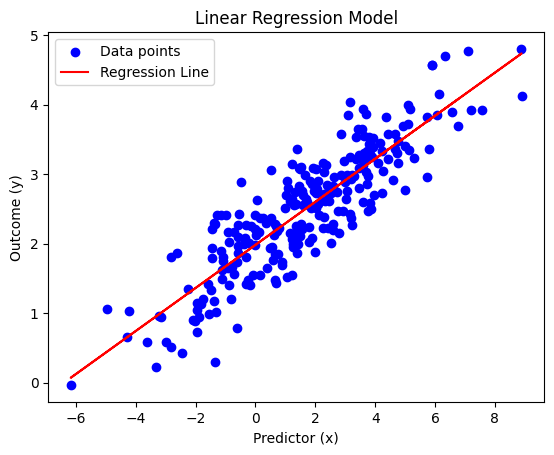

In [28]:
# Generate sample data
n_observations_simple = 250
x = 2.5 * np.random.randn(n_observations_simple) + 1.5   # Predictor data
res = 0.5 * np.random.randn(n_observations_simple)       # Random noise
y = 2 + 0.3 * x + res                  # Dependent variable

# Apply linear regression function
m, b = simple_linear_regression(x, y)

# Plot data and regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m*x + b, color='red', label='Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (y)')
plt.legend()
plt.show()

# Multilinear Regression from Scratch

In this section of the project, we're elevating our exploration from simple linear regression to multilinear regression. This approach allows us to understand and predict outcomes influenced by multiple independent variables, offering a more comprehensive view of complex relationships.

**Understanding Multilinear Regression**  
Multilinear regression extends the concept of linear regression to encompass multiple predictors. Instead of predicting $y$ from a single $x$, it predicts the dependent variable ($y$) using several independent variables ($x_1, x_2, x_3, \ldots$). The equation for multilinear regression can be expressed as:  $y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + \ldots + b_nx_n$ and calculated via $\boldsymbol{\beta} = (X^TX)^{-1}X^TY$
where:
- $y$ is the dependent variable,
- $x_1, x_2, \ldots, x_n$ are the independent variables,
- $b_1, b_2, \ldots, b_n$ are the coefficients reflecting the influence of each independent variable on $y$,
- $b_0$ is the intercept.

**Calculating Coefficients in Multilinear Regression**  
The coefficients $b_0, b_1, b_2, \ldots, b_n$ are calculated using methods like the Ordinary Least Squares (OLS), which minimizes the sum of the squares of the differences between observed and predicted values.

**Implementing Multilinear Regression**  
Below, we'll delve into the implementation of multilinear regression. We will start by generating a dataset with multiple features and then proceed to build a model that can handle this complexity. Let's explore how multiple variables interact with each other and influence the outcome!


In [19]:
def multiple_linear_regression(X, y):
    """
    Computes the coefficients for a multiple linear regression model using the OLS method.

    Args:
        X (np.array): A 2D numpy array where each column is a feature and each row is an observation.
        y (np.array): A 1D numpy array containing the dependent variable data.

    Returns: 
        np.array: An array of coefficients, including the intercept as the first element.

    Raises:
        ValueError: If the number of observations in 'X' and 'y' are not equal.
    """
    if X.shape[0] != len(y):
        raise ValueError("The number of observations in 'X' and 'y' must be the same.")

    # Adding a column of ones to X to account for the intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])

    # Calculating the coefficients using the OLS formula
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    return coefficients

R-squared: 0.92


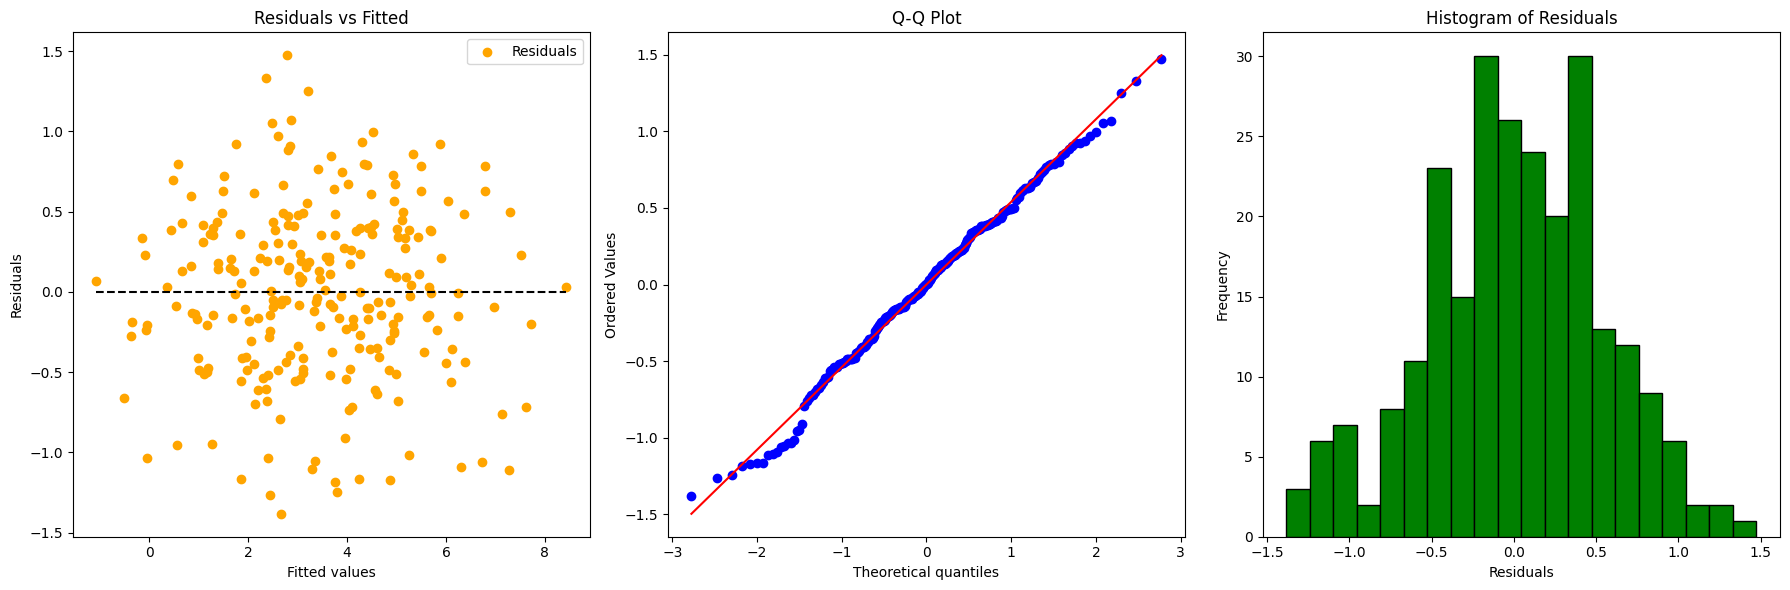

In [27]:
# Generate sample data with three predictor variables
n_observations_multiple = 250
x1 = 2.5 * np.random.randn(n_observations_multiple) + 1.5
x2 = 1.5 * np.random.randn(n_observations_multiple) + 0.5
x3 = 2.0 * np.random.randn(n_observations_multiple) + 1.0
X = np.column_stack((x1, x2, x3))  # Combine into a single 2D array
res = 0.5 * np.random.randn(n_observations_multiple)    # Random noise
y = 2 + 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + res  # Dependent variable

# Apply multiple linear regression function
coeffs = multiple_linear_regression(X, y)

# Calculating predicted values and residuals
y_pred = coeffs[0] + np.sum(coeffs[1:] * X, axis=1)
residuals = y - y_pred

# R-squared value
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f'R-squared: {r_squared:.2f}')

# Creating a figure with 3 subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Residuals vs Fitted
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals, color='orange', label='Residuals')
plt.hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred), color='black', linestyles='dashed')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.legend()

# Subplot 2: Q-Q Plot
plt.subplot(1, 3, 2)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot')

# Subplot 3: Histogram of Residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, color='green', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()